In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import random

In [2]:
S = [1, 5, 10]
Q = [0, 1, 5, 10]
lam = [0.01, 0.1, 1, 10]
mu = [0.01, 0.04, 0.16, 0.64, 2.56, 10.24]

In [3]:
def pos(t, lam):
#     return 1-math.exp(-lam*t)
    return lam * math.exp(-lam*t)


In [4]:
def sim2(prob):
    poll = np.arange(1, 10001)
    select = np.random.choice(poll)
    return select <= prob*10000

In [22]:
def sim(pos):
    return random.random() < pos

1.0000000000000007
952


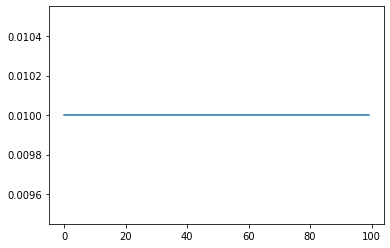

In [51]:
plt.plot([i for i in range(100)], [pos(0, 0.01) for i in range(100)])
count = 0
come = 0

for i in range(100):
    count += pos(0, 0.01)
print(count)

time_count = 0
for i in range(100000):
    time_count += 1
    if(sim(pos(0, 0.01))):
#         print("happen in ",time_count)
        come += 1
        time_count = 0

print(come)

In [143]:
arrival_num = 0
block_num = 0
queue_num = 0
server_num = 0

q = 0
s = 1
lam = 0.01
mu = 0.04
time = 0

lam /= 100
mu /= 100

time_count = np.zeros(s+1)
leav_prob = np.zeros(s)
server_count = np.zeros(s)



for runtime in range(100000):

    for i in range(s):
        if(server_count[i] == 1):
            #cal leaving prob.
            leav_prob[i] = mu
            #check leave
            if(sim(leav_prob[i])):
                if(queue_num > 0):
                    queue_num -= 1
                server_num -= 1  
                #add deaparture
                server_count[i] = 0
    #cal arrival prob.
    arrival_prob = lam

    #check arriavl
    if(sim(arrival_prob)):
        arrival_num +=1
        #check block
        if(queue_num+server_num > s+q-1):
            block_num += 1
        else:
        #check arrive
            if(server_num < s):
                for i in range(s):
                    if(server_count[i] == 0):
                        server_count[i] = 1
                        server_num += 1
                        break
            elif(queue_num < q):
                 queue_num += 1
            else:
                print("arrival but no where to go")

    

    time += 1
    
    
print(arrival_num)
print(block_num)
if(block_num != 0):
    print(block_num/arrival_num*100, "%")
    print(block_num/arrival_num)
else:
    print("0")

13
5
38.46153846153847 %
0.38461538461538464


In [33]:
def experiment(s, q, l, m):
    time = 0
    arrival_num = 0
    block_num = 0
    queue_num = 0
    server_num = 0
    

    leav_prob = np.zeros(s)
    server_count = np.zeros(s)

    for runtime in range(1000000):
        for i in range(s):
            if(server_count[i] == 1):
                #cal leaving prob.
                leav_prob[i] = m
                #check leave
                if(sim(leav_prob[i])):
                    if(queue_num > 0):
                        queue_num -= 1
                    server_num -= 1  
                    #add deaparture
                    server_count[i] = 0
                    
        #cal arrival prob.
        arrival_prob = l
        #check arriavl
        if(sim(arrival_prob)):
            arrival_num +=1
            #check block
            if(queue_num+server_num > s+q-1):
                block_num += 1
            else:
            #check arrive
                if(server_num < s):
                    for i in range(s):
                        if(server_count[i] == 0):
                            server_count[i] = 1
                            server_num += 1
                            break
                elif(queue_num < q):
                     queue_num += 1
                else:
                    print("arrival but no where to go")



        time += 1


    if(block_num != 0):
#             print(block_num/arrival_num*100, "%")
        return (block_num/arrival_num)
    else:
        return 0

In [30]:
print(experiment(2, 0, 0.03, 0.01))

29803
15674
0.5259202093748951


In [34]:
columns = ["BP_"+str(i) for i in range(1, 25)]
count = 0
for s in tqdm(S):
    for q in Q:
        bp_l = np.zeros(0)
        er = np.zeros(0)
        for l in lam:
            l /= 100
            for m in mu:
                #10^-2 sec to one time unit
                m /= 100
                bp = np.zeros(0)
                for epoch in range(10):
                    bp_n = experiment(s, q, l, m)
                    bp = np.append(bp, bp_n)

#                     event_table = pd.DataFrame({"Time unit":time_unit, "Arrival":arrival, "Departure":departure, "Blocked":blocked})
#                     status_table = pd.DataFrame({"# of queue":[q], "# of server":[s], "lambda":[l], "mue":[m]})
#                     status_table.to_csv('event_table.csv', index=False, mode='a')
#                     event_table.to_csv('event_table.csv', index=False, mode='a')
#             print(bp_l.shape)
#             print(er.shape)
                print("Q ",q,"S ", s,"lam ", l*100,"mu ", m*100, "Er", l/m)
                er = np.append(er, l/m)
                bp_l = np.append(bp_l, bp.mean())

        if(q==0):
            blocking_probability_table_Q0 = pd.DataFrame([er, bp_l],index=['Erlang', s], columns=columns)
            blocking_probability_table_Q0.to_csv('blocking_probability_table_Q0.csv', mode='a')
        else:
            blocking_probability_table_QS = pd.DataFrame([er, bp_l],index=['Erlang', s], columns=columns)
            blocking_probability_table_QS.to_csv('blocking_probability_table_QS.csv', mode='a')


  0%|          | 0/3 [00:00<?, ?it/s]

Q  0 S  1 lam  0.01 mu  0.01 Er 1.0
Q  0 S  1 lam  0.01 mu  0.04 Er 0.25
Q  0 S  1 lam  0.01 mu  0.16 Er 0.0625
Q  0 S  1 lam  0.01 mu  0.64 Er 0.015625
Q  0 S  1 lam  0.01 mu  2.56 Er 0.00390625
Q  0 S  1 lam  0.01 mu  10.24 Er 0.0009765625
Q  0 S  1 lam  0.1 mu  0.01 Er 10.0
Q  0 S  1 lam  0.1 mu  0.04 Er 2.5
Q  0 S  1 lam  0.1 mu  0.16 Er 0.625
Q  0 S  1 lam  0.1 mu  0.64 Er 0.15625
Q  0 S  1 lam  0.1 mu  2.56 Er 0.0390625
Q  0 S  1 lam  0.1 mu  10.24 Er 0.009765625
Q  0 S  1 lam  1.0 mu  0.01 Er 100.0
Q  0 S  1 lam  1.0 mu  0.04 Er 25.0
Q  0 S  1 lam  1.0 mu  0.16 Er 6.25
Q  0 S  1 lam  1.0 mu  0.64 Er 1.5625
Q  0 S  1 lam  1.0 mu  2.56 Er 0.390625
Q  0 S  1 lam  1.0 mu  10.24 Er 0.09765625
Q  0 S  1 lam  10.0 mu  0.01 Er 1000.0
Q  0 S  1 lam  10.0 mu  0.04 Er 250.0
Q  0 S  1 lam  10.0 mu  0.16 Er 62.5
Q  0 S  1 lam  10.0 mu  0.64 Er 15.625
Q  0 S  1 lam  10.0 mu  2.56 Er 3.90625
Q  0 S  1 lam  10.0 mu  10.24 Er 0.9765625
Q  1 S  1 lam  0.01 mu  0.01 Er 1.0
Q  1 S  1 lam  0.01 mu  

 33%|███▎      | 1/3 [15:11<30:23, 911.93s/it]

Q  10 S  1 lam  10.0 mu  10.24 Er 0.9765625
Q  0 S  5 lam  0.01 mu  0.01 Er 1.0
Q  0 S  5 lam  0.01 mu  0.04 Er 0.25
Q  0 S  5 lam  0.01 mu  0.16 Er 0.0625
Q  0 S  5 lam  0.01 mu  0.64 Er 0.015625
Q  0 S  5 lam  0.01 mu  2.56 Er 0.00390625
Q  0 S  5 lam  0.01 mu  10.24 Er 0.0009765625
Q  0 S  5 lam  0.1 mu  0.01 Er 10.0
Q  0 S  5 lam  0.1 mu  0.04 Er 2.5
Q  0 S  5 lam  0.1 mu  0.16 Er 0.625
Q  0 S  5 lam  0.1 mu  0.64 Er 0.15625
Q  0 S  5 lam  0.1 mu  2.56 Er 0.0390625
Q  0 S  5 lam  0.1 mu  10.24 Er 0.009765625
Q  0 S  5 lam  1.0 mu  0.01 Er 100.0
Q  0 S  5 lam  1.0 mu  0.04 Er 25.0
Q  0 S  5 lam  1.0 mu  0.16 Er 6.25
Q  0 S  5 lam  1.0 mu  0.64 Er 1.5625
Q  0 S  5 lam  1.0 mu  2.56 Er 0.390625
Q  0 S  5 lam  1.0 mu  10.24 Er 0.09765625
Q  0 S  5 lam  10.0 mu  0.01 Er 1000.0
Q  0 S  5 lam  10.0 mu  0.04 Er 250.0
Q  0 S  5 lam  10.0 mu  0.16 Er 62.5
Q  0 S  5 lam  10.0 mu  0.64 Er 15.625
Q  0 S  5 lam  10.0 mu  2.56 Er 3.90625
Q  0 S  5 lam  10.0 mu  10.24 Er 0.9765625
Q  1 S  5 lam  0

 67%|██████▋   | 2/3 [1:00:29<24:13, 1453.70s/it]

Q  10 S  5 lam  10.0 mu  10.24 Er 0.9765625
Q  0 S  10 lam  0.01 mu  0.01 Er 1.0
Q  0 S  10 lam  0.01 mu  0.04 Er 0.25
Q  0 S  10 lam  0.01 mu  0.16 Er 0.0625
Q  0 S  10 lam  0.01 mu  0.64 Er 0.015625
Q  0 S  10 lam  0.01 mu  2.56 Er 0.00390625
Q  0 S  10 lam  0.01 mu  10.24 Er 0.0009765625
Q  0 S  10 lam  0.1 mu  0.01 Er 10.0
Q  0 S  10 lam  0.1 mu  0.04 Er 2.5
Q  0 S  10 lam  0.1 mu  0.16 Er 0.625
Q  0 S  10 lam  0.1 mu  0.64 Er 0.15625
Q  0 S  10 lam  0.1 mu  2.56 Er 0.0390625
Q  0 S  10 lam  0.1 mu  10.24 Er 0.009765625
Q  0 S  10 lam  1.0 mu  0.01 Er 100.0
Q  0 S  10 lam  1.0 mu  0.04 Er 25.0
Q  0 S  10 lam  1.0 mu  0.16 Er 6.25
Q  0 S  10 lam  1.0 mu  0.64 Er 1.5625
Q  0 S  10 lam  1.0 mu  2.56 Er 0.390625
Q  0 S  10 lam  1.0 mu  10.24 Er 0.09765625
Q  0 S  10 lam  10.0 mu  0.01 Er 1000.0
Q  0 S  10 lam  10.0 mu  0.04 Er 250.0
Q  0 S  10 lam  10.0 mu  0.16 Er 62.5
Q  0 S  10 lam  10.0 mu  0.64 Er 15.625
Q  0 S  10 lam  10.0 mu  2.56 Er 3.90625
Q  0 S  10 lam  10.0 mu  10.24 Er 0.

100%|██████████| 3/3 [2:18:54<00:00, 2778.06s/it]

Q  10 S  10 lam  10.0 mu  10.24 Er 0.9765625


In [107]:
event_table = pd.DataFrame({"Time unit":time_unit, "Arrival":arrival, "Departure":departure, "Blocked":blocked})
status_table = pd.DataFrame({"# of queue":[Q], "# of server":[S], "lambda":[lam], "mue":[mu]})
status_table.to_csv('event_table.csv', index=False, mode='a')
event_table.to_csv('event_table.csv', index=False, mode='a')

       Time unit  Arrival  Departure  Blocked
0              0      0.0        0.0      0.0
1              1      0.0        0.0      0.0
2              2      0.0        0.0      0.0
3              3      0.0        0.0      0.0
4              4      0.0        0.0      0.0
...          ...      ...        ...      ...
99995      99995      0.0        0.0      0.0
99996      99996      0.0        0.0      0.0
99997      99997      0.0        0.0      0.0
99998      99998      0.0        0.0      0.0
99999      99999      1.0        0.0      0.0

[100000 rows x 4 columns]


In [97]:
x=[2,3]
blocking_probability_table_Q0 = pd.DataFrame([x,[1,3],[1,2]],index=[1, 5, 10], columns=['BP_1', 'BP_2'])
print(blocking_probability_table_Q0)
print(blocking_probability_table_Q0['BP_1'].iloc[1])
print(blocking_probability_table_Q0.iloc[0,:])
print(["BP_"+str(i) for i in range(1, 25)])

    BP_1  BP_2
1      2     3
5      1     3
10     1     2
1
BP_1    2
BP_2    3
Name: 1, dtype: int64
['BP_1', 'BP_2', 'BP_3', 'BP_4', 'BP_5', 'BP_6', 'BP_7', 'BP_8', 'BP_9', 'BP_10', 'BP_11', 'BP_12', 'BP_13', 'BP_14', 'BP_15', 'BP_16', 'BP_17', 'BP_18', 'BP_19', 'BP_20', 'BP_21', 'BP_22', 'BP_23', 'BP_24']


In [41]:
blocking_probability_table_QS = pd.DataFrame()

0.0


In [113]:
x = np.zeros(0)
x = np.append(x, [1,2,3])
print(x)
print(x.mean())

[1. 2. 3.]
2.0


In [13]:
print( random.randint(1,10) ) 

1


In [14]:
def sim(pos):
    return random.randint(1, 1001) < pos*1000

In [26]:
count = 0
for i in range(100000):
    if(sim(0.1)):
        count += 1
print(count)

9675


In [20]:
def sim2(prob):
    poll = np.arange(1, 1001)
    select = np.random.choice(poll)
    return select <= prob*1000

In [23]:
count = 0
for i in range(100000):
    if(sim2(0.1)):
        count += 1
print(count)

10055
